MEN-DMP21
hlife-MEN-DMP21-A-A
The area of hlife-MEN-DMP21-A-A is 0.8583772564250001


['hlife', 'MEN', 'DMP21', 'A', 'A']
hlife-MEN-DMP21-A-B
The area of hlife-MEN-DMP21-A-B is 0.7794137169750001


['hlife', 'MEN', 'DMP21', 'A', 'B']
hlife-MEN-DMP21-B-A
The area of hlife-MEN-DMP21-B-A is 0.7794254489416667


['hlife', 'MEN', 'DMP21', 'B', 'A']
hlife-MEN-DMP21-B-B
The area of hlife-MEN-DMP21-B-B is 0.7911495984666668


['hlife', 'MEN', 'DMP21', 'B', 'B']


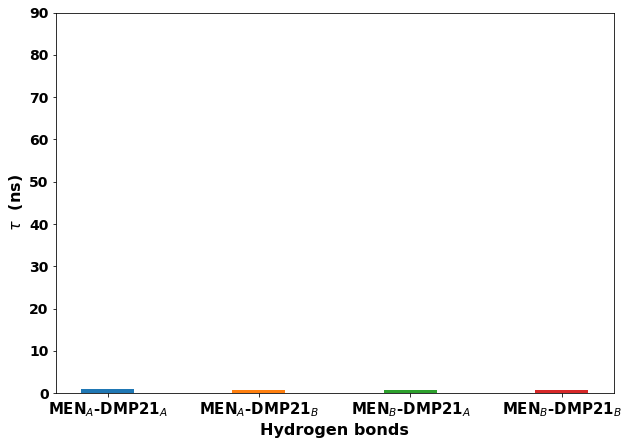

In [2]:
# This function takes in a path as well as file descriptions and plots graphs. This is quite specific to GROMACS
# outputs from hydrogen bond calculations. This plots related graphs on the same pictures. Uses new tags and 
# displays areas. 
# For lifetimes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.integrate import simps

pathway = Path()

for folderz in pathway.glob('./lignin*/M*'):
    print(folderz.stem)
    fig1 = plt.figure()
    fig1.set_size_inches(10, 7, forward=True)
    test = fig1.add_subplot(1,1,1)
    bar_x = [] # interaction
    bar_y = []  # hbond_num
    # error = []
    for txt in pathway.glob("{target}/*/hlife*.txt".format(target=folderz)):        
        txtfile = txt.name            
        print(txt.stem)

        if str(txtfile).__contains__("hnum"):
            pass
        else:            
            data = pd.read_csv('{}'.format(txt), sep='\s+', header=None, skiprows=[0,1])
            data = pd.DataFrame(data)
            x = data[0]/1000
            y = data[2]         
            
            area = simps(y, dx = 0.01)  # Change dx to 1 for files prior to 7 Sep 2020
            print("The area of {thing} is {val}".format(thing= txt.stem, val=area))
            print("\n")
            tag_array = txt.stem.split('-')
            print(tag_array)   
            # Try uncommenting this tag block and commenting the other one if MV11 throws errors
            # tag1 = "{First}".format(First=tag_array[2])
            # tag2 = "$_{second}$".format(second=tag_array[4])
            # tag3 = "-{third}".format(third=tag_array[3])
            # tag4 = "$_{fourth}$".format(fourth=tag_array[5])
            tag1 = "{First}".format(First=tag_array[1])
            tag2 = "$_{second}$".format(second=tag_array[3])
            tag3 = "-{third}".format(third=tag_array[2])
            tag4 = "$_{fourth}$".format(fourth=tag_array[4])
            tagg = tag1 + tag2 + tag3 + tag4
    #                 print(tagg)           
            bar_y.append(area)
            bar_x.append(tagg)
            plt.yticks(fontsize=14)
            x_index = np.arange(len(bar_x))
            prop_cycle = plt.rcParams['axes.prop_cycle']
            colors = prop_cycle.by_key()['color']  # setting default matplotlib colours
            bar1 = test.bar(x_index+4, bar_y, width=0.35, color=colors)
            plt.xticks(x_index+4, bar_x, weight='bold')
            plt.yticks(weight='bold')
            test.set_xticklabels(bar_x, fontsize=15)
    #                 test.set_xlim([0, 60])
            test.set_ylim([0, 90])
            test.set_xlabel("Hydrogen bonds", fontsize=16, weight='bold')
            test.set_ylabel(r"$\tau$  (ns)", fontsize=16, weight='bold')
                        
    fig1.savefig('{folder}\{stem}'.format(stem=txt.stem, folder=folderz.parent ), dpi=fig1.dpi,bbox_inches='tight')
    plt.show()

MEN-DMP21
hnum-MEN-DMP21-A-A
20.89720513974301


hnum-MEN-DMP21-A-B
16.680265986700665


hnum-MEN-DMP21-B-A
16.680265986700665


hnum-MEN-DMP21-B-B
3.15899205039748




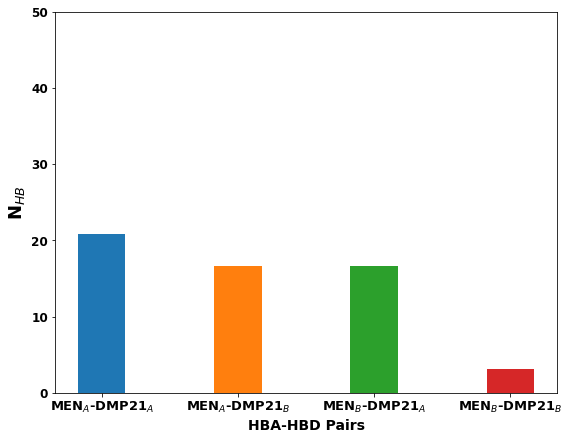

In [3]:
# This is for hnum. It plots hydrogen bond averages in a bar chart.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pathway = Path()

for file in pathway.glob('lignin*/M*'):
    print(file.stem)
    fig1 = plt.figure()
    fig1.set_size_inches(9, 7, forward=True)
    test = fig1.add_subplot(1,1,1)
    bar_x = [] # interaction
    bar_y = []  # hbond_num
    for txt in pathway.glob("{target}/*/hnum*.txt".format(target=file)):        
        print(txt.stem)
        # colour=magic_sort(file.stem)
        txtfile = txt.name
        tag_array = txt.stem.split('-')
        # print(txt.stem.split(''))

        # Use the file names to set the tags
        tag1 = "{First}".format(First=tag_array[1])
        tag2 = "$_{second}$".format(second=tag_array[3])
        tag3 = "-{third}".format(third=tag_array[2])
        tag4 = "$_{fourth}$".format(fourth=tag_array[4])
        tag = tag1 + tag2 + tag3 + tag4
        data = pd.read_csv('{}'.format(txt), sep='\s+', header=None, skiprows=[0,1])
        data = pd.DataFrame(data)
        y = data[1].mean()
        print(y)
        print('\n')
        bar_y.append(y)
        bar_x.append(tag)
        x_index = np.arange(len(bar_x))

        # Use default colors from pyplot
        prop_cycle = plt.rcParams['axes.prop_cycle']
        colors = prop_cycle.by_key()['color']  

        # Plotting
        test.bar(x_index+4, bar_y, width=0.35, color=colors)
        plt.xticks(x_index+4, bar_x, weight="bold")
        plt.yticks(fontsize=12, weight='bold')
        test.set_ylim([0, 50])
        test.set_xlabel("HBA-HBD Pairs", fontsize=14, weight="bold")
        test.set_ylabel("N$_{HB}$", fontsize=18, weight='bold') 
        test.set_xticklabels(bar_x, fontsize=13, weight='bold')     
    fig1.savefig('{folder}\{stem}'.format(stem=txt.stem, folder=file.parent ),dpi=fig1.dpi, bbox_inches='tight')
#     plt.text(2,20,"Ussy")
    plt.show()

In [7]:
jupyter kernelspec list

SyntaxError: invalid syntax (<ipython-input-7-68dcfb427789>, line 1)